# Exploring National Competitiveness

This notebook is an exploration of the World Economic Forum's national competitiveness index, and how it relates to other measures of economic and social welfare. (It's also an excuse to learn the Jupyter environment.)

## Please respect WEF's data terms of use:
http://reports.weforum.org/global-competitiveness-report-2018/competitiveness-rankings/

## Data requirements for this analysis:
'GCI_4.0_2018_Dataset' tab of the WEF data download, saved as CSV (see the link above).
'2018-Results' tab of the Social Progress Index download, saved as CSV:
https://www.socialprogress.org/?tab=4


In [851]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [852]:
#Extract national competitiveness scores and rankings along with country codes.

wef_data = pd.read_csv("GCI_4.0_2018_Dataset.csv")
scores = wef_data.iloc[4,]
scores = scores[9:161]
ranks = wef_data.iloc[9,]
ranks = ranks[9:161]
country_codes = wef_data.iloc[1,]
country_codes = country_codes[9:161]
countries = wef_data.iloc[2,]
countries = countries[9:161]

#Create a dataframe with country codes, competitiveness scores and rankings
df = pd.DataFrame(data={'Code': country_codes, 'Countries':countries, 'Competitiveness_score': scores, 'Competitiveness_rank':ranks})

print df.shape

(152, 4)


In [853]:
df.head(10)

,Code,Competitiveness_rank,Competitiveness_score,Countries
Unnamed: 9,AGO,137,37.05578811218694,Angola
Unnamed: 10,ALB,76,58.10159560077285,Albania
Unnamed: 11,ARE,27,73.37190038467266,United Arab Emirates
Unnamed: 12,ARG,81,57.48611008877519,Argentina
Unnamed: 13,ARM,70,59.86148111465999,Armenia
Unnamed: 14,AUS,14,78.85166974580595,Australia
Unnamed: 15,AUT,22,76.33810153820535,Austria
Unnamed: 16,AZE,69,60.04414805382071,Azerbaijan
Unnamed: 17,BDI,136,37.52763496572845,Burundi
Unnamed: 18,BEL,21,76.61015539007471,Belgium


## Which countries are most competitive?

In [854]:
df = df.sort_values('Competitiveness_score',ascending=False)

df.head(10)

,Code,Competitiveness_rank,Competitiveness_score,Countries
Unnamed: 142,USA,1,85.6411783749984,United States
Unnamed: 122,SGP,2,83.47791304680126,Singapore
Unnamed: 41,DEU,3,82.83885508048462,Germany
Unnamed: 30,CHE,4,82.58582352688386,Switzerland
Unnamed: 73,JPN,5,82.46773042806363,Japan
Unnamed: 104,NLD,6,82.37973267223747,Netherlands
Unnamed: 59,HKG,7,82.25146144499804,Hong Kong SAR
Unnamed: 52,GBR,8,81.9878667696146,United Kingdom
Unnamed: 128,SWE,9,81.65535419181329,Sweden
Unnamed: 42,DNK,10,80.62462032924725,Denmark


## And which countries are least competitive?

In [855]:
df = df.sort_values('Competitiveness_score',ascending=True)

df.head(10)

,Code,Competitiveness_rank,Competitiveness_score,Countries
Unnamed: 131,TCD,140,35.52021394107925,Chad
Unnamed: 145,YEM,139,36.39569426022771,Yemen
Unnamed: 62,HTI,138,36.4508554714887,Haiti
Unnamed: 9,AGO,137,37.05578811218694,Angola
Unnamed: 17,BDI,136,37.52763496572845,Burundi
Unnamed: 35,COD,135,38.24125507766902,"Congo, Democratic Rep."
Unnamed: 123,SLE,134,38.80016628171635,Sierra Leone
Unnamed: 96,MOZ,133,39.75360719747464,Mozambique
Unnamed: 82,LBR,132,40.54749445764337,Liberia
Unnamed: 97,MRT,131,40.7709392972548,Mauritania


## Adding in data from the Social Progress Index

The social progress index attempts to offer a "comprehensive measure of real quality of life, independent of economic indicators" and "is designed to complement, rather than replace, economic measures such as GDP."

Does national competitiveness translate into quality of life? This data can't answer that question, but it offers a starting point to explore it by comparing how countries do on the two measures.

In [856]:
spi_data = pd.read_csv("2018-Results.csv")
spi_data.shape

(236, 69)

In [857]:
df2 = pd.merge(df, spi_data, on='Code')
df2 = df2.dropna(subset=['Competitiveness_score','Social Progress Index'])
df2.head(10)

,Code,Competitiveness_rank,Competitiveness_score,Countries,Country,Social Progress Index,Basic Human Needs,Foundations of Wellbeing,Opportunity,Nutrition and Basic Medical Care,...,Corruption (0=high; 100=low),Acceptance of gays and lesbians (0=low; 100=high),Discrimination and violence against minorities (0=low; 10=high),Equality of political power by gender (0=unequal power; 4=equal power),Equality of political power by socioeconomic position (0=unequal power; 4=equal power),Equality of political power by social group (0=unequal power; 4=equal power),Years of tertiary schooling,Women's average years in school,Globally ranked universities (points),Percent of tertiary students enrolled in globally ranked universities
0,TCD,140,35.52021394107925,Chad,Chad,28.20,30.76,32.45,21.39,45.63,...,20.0,9.744300,7.7000,1.160160,0.705601,0.395146,NaN,1.63,0,0.0
1,YEM,139,36.39569426022771,Yemen,Yemen,37.29,50.36,40.84,20.67,67.69,...,16.0,NaN,9.5000,0.576632,0.493392,1.262050,0.11,2.35,0,0.0
3,AGO,137,37.05578811218694,Angola,Angola,39.10,45.68,40.86,30.76,68.48,...,19.0,12.627000,7.2000,2.266320,0.657543,0.873608,NaN,5.31,0,0.0
4,BDI,136,37.52763496572845,Burundi,Burundi,37.92,43.54,44.14,26.07,53.07,...,22.0,3.466700,7.6000,0.956246,0.759429,1.515490,0.04,4.23,0,0.0
5,COD,135,38.24125507766902,"Congo, Democratic Rep.","Congo, Democratic Republic of",35.63,38.56,41.89,26.45,53.86,...,21.0,12.737800,9.9613,1.806100,1.458960,1.504370,0.04,6.26,0,0.0
6,SLE,134,38.80016628171635,Sierra Leone,Sierra Leone,44.80,47.63,47.07,39.70,47.78,...,30.0,13.130500,6.5000,2.287680,2.037150,2.538250,0.09,2.58,0,0.0
7,MOZ,133,39.75360719747464,Mozambique,Mozambique,44.49,47.41,48.92,37.14,60.77,...,25.0,30.717199,5.1000,1.618370,1.891490,3.007620,0.02,2.99,0,0.0
8,LBR,132,40.54749445764337,Liberia,Liberia,46.35,44.63,46.71,47.71,52.99,...,31.0,8.563400,5.5000,2.784160,2.442020,3.062400,0.16,4.37,0,0.0
9,MRT,131,40.7709392972548,Mauritania,Mauritania,41.85,53.95,43.66,27.95,69.69,...,28.0,5.312700,6.7000,1.124490,0.346734,0.871951,0.07,4.44,0,0.0
10,LSO,130,42.31866713655996,Lesotho,Lesotho,48.93,45.45,47.47,53.89,53.60,...,42.0,23.448900,3.6000,2.458370,2.803410,3.400170,0.06,10.24,0,0.0


## Which countries score highest for human welfare?

In [858]:
df2 = df2.sort_values('Social Progress Index',ascending=False)

df2.head(10)

,Code,Competitiveness_rank,Competitiveness_score,Countries,Country,Social Progress Index,Basic Human Needs,Foundations of Wellbeing,Opportunity,Nutrition and Basic Medical Care,...,Corruption (0=high; 100=low),Acceptance of gays and lesbians (0=low; 100=high),Discrimination and violence against minorities (0=low; 10=high),Equality of political power by gender (0=unequal power; 4=equal power),Equality of political power by socioeconomic position (0=unequal power; 4=equal power),Equality of political power by social group (0=unequal power; 4=equal power),Years of tertiary schooling,Women's average years in school,Globally ranked universities (points),Percent of tertiary students enrolled in globally ranked universities
124,NOR,16,78.15747932745576,Norway,Norway,90.26,96.62,93.19,80.97,99.00,...,85.0,88.901001,3.4,3.60607,2.98435,3.18915,0.97,15.42,9,30.0
116,ISL,24,74.50933539957904,Iceland,Iceland,90.24,97.51,91.81,81.39,99.11,...,77.0,92.129898,1.1,2.58803,3.07599,3.36340,1.31,14.86,3,60.0
136,CHE,4,82.58582352688386,Switzerland,Switzerland,89.97,96.60,91.72,81.59,98.90,...,85.0,73.334999,3.6,3.04065,3.04000,3.57263,1.10,14.42,22,50.0
130,DNK,10,80.62462032924725,Denmark,Denmark,89.96,96.17,92.06,81.64,98.72,...,88.0,80.350502,4.4,3.28380,3.55148,3.42399,0.95,15.13,13,40.0
129,FIN,11,80.26160620004491,Finland,Finland,89.77,95.66,92.49,81.16,99.22,...,85.0,80.416397,1.5,3.08577,3.24884,3.26332,0.95,15.05,18,30.0
135,JPN,5,82.46773042806363,Japan,Japan,89.74,97.78,94.66,76.78,98.21,...,73.0,28.907900,3.4,1.99409,3.13277,3.29081,1.37,15.51,111,30.0
134,NLD,6,82.37973267223747,Netherlands,Netherlands,89.34,96.41,91.65,79.97,98.75,...,82.0,90.378304,4.5,3.13459,3.41598,2.90859,0.98,14.69,26,30.0
121,LUX,19,76.63068227747486,Luxembourg,Luxembourg,89.27,94.97,91.41,81.43,98.97,...,82.0,77.685303,2.8,2.69461,3.17716,3.78530,1.05,14.08,2,80.0
137,DEU,3,82.83885508048462,Germany,Germany,89.21,95.35,90.71,81.57,98.88,...,81.0,71.760300,4.9,3.42478,3.02198,3.45784,0.76,14.24,99,50.0
122,NZL,18,77.50755240218201,New Zealand,New Zealand,89.12,96.81,90.62,79.91,98.11,...,89.0,76.211403,3.3,3.09920,2.62412,2.78660,1.19,15.04,15,50.0


## Which countries score worst for human welfare?

In [859]:
df2 = df2.sort_values('Social Progress Index',ascending=True)

df2.head(10)

,Code,Competitiveness_rank,Competitiveness_score,Countries,Country,Social Progress Index,Basic Human Needs,Foundations of Wellbeing,Opportunity,Nutrition and Basic Medical Care,...,Corruption (0=high; 100=low),Acceptance of gays and lesbians (0=low; 100=high),Discrimination and violence against minorities (0=low; 10=high),Equality of political power by gender (0=unequal power; 4=equal power),Equality of political power by socioeconomic position (0=unequal power; 4=equal power),Equality of political power by social group (0=unequal power; 4=equal power),Years of tertiary schooling,Women's average years in school,Globally ranked universities (points),Percent of tertiary students enrolled in globally ranked universities
0,TCD,140,35.52021394107925,Chad,Chad,28.20,30.76,32.45,21.39,45.63,...,20.0,9.744300,7.7000,1.160160,0.705601,0.395146,NaN,1.63,0,0.0
5,COD,135,38.24125507766902,"Congo, Democratic Rep.","Congo, Democratic Republic of",35.63,38.56,41.89,26.45,53.86,...,21.0,12.737800,9.9613,1.806100,1.458960,1.504370,0.04,6.26,0,0.0
1,YEM,139,36.39569426022771,Yemen,Yemen,37.29,50.36,40.84,20.67,67.69,...,16.0,NaN,9.5000,0.576632,0.493392,1.262050,0.11,2.35,0,0.0
4,BDI,136,37.52763496572845,Burundi,Burundi,37.92,43.54,44.14,26.07,53.07,...,22.0,3.466700,7.6000,0.956246,0.759429,1.515490,0.04,4.23,0,0.0
14,GIN,126,43.23127279714448,Guinea,Guinea,39.09,46.39,41.34,29.55,57.71,...,27.0,10.811500,8.9000,1.179950,1.800430,1.675740,NaN,2.07,0,0.0
3,AGO,137,37.05578811218694,Angola,Angola,39.10,45.68,40.86,30.76,68.48,...,19.0,12.627000,7.2000,2.266320,0.657543,0.873608,NaN,5.31,0,0.0
18,ETH,122,44.45183107974748,Ethiopia,Ethiopia,41.47,45.87,46.56,31.99,60.78,...,35.0,3.820700,8.8000,1.482940,1.633550,0.106732,NaN,3.75,0,0.0
9,MRT,131,40.7709392972548,Mauritania,Mauritania,41.85,53.95,43.66,27.95,69.69,...,28.0,5.312700,6.7000,1.124490,0.346734,0.871951,0.07,4.44,0,0.0
16,BFA,124,43.89803312471886,Burkina Faso,Burkina Faso,44.02,47.08,44.45,40.53,61.61,...,42.0,9.005300,4.2000,1.637630,1.946020,2.497260,NaN,1.86,0,0.0
7,MOZ,133,39.75360719747464,Mozambique,Mozambique,44.49,47.41,48.92,37.14,60.77,...,25.0,30.717199,5.1000,1.618370,1.891490,3.007620,0.02,2.99,0,0.0


## Comparing competitiveness to quality of life

### How correlated are countries' national competitiveness scores with SPI's human welfare index?

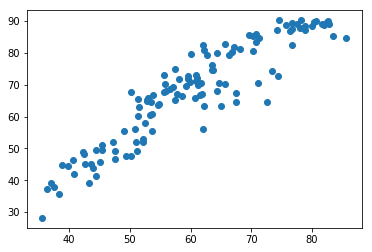

In [860]:
#Convert competitiveness data to float from string
df2['Competitiveness_score'] = df2['Competitiveness_score'].astype(float)

#Plot competitiveness scores vs. social progress index
plt.scatter(df2['Competitiveness_score'],df2['Social Progress Index'])
plt.show()

In [861]:
#Calculate correlation between competitiveness score and social progress index
np.corrcoef(df2['Competitiveness_score'],df2['Social Progress Index'])

array([[ 1.        ,  0.92557065],
       [ 0.92557065,  1.        ]])